In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [210]:
df_train=pd.read_csv('big mart train.csv')
print(df_train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [211]:
df_test=pd.read_csv('bigmart test.csv')
print(df_test)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [212]:
train=df_train.copy()
test=df_test.copy()

In [213]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [214]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [215]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [216]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [217]:
test['Item_Outlet_Sales'] = 0

In [218]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 12)


In [219]:
df=pd.concat([train,test],sort=False)

In [220]:
df.shape

(14204, 12)

In [221]:
df['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [223]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [224]:
categorical_features=df.select_dtypes(include=[np.object])
categorical_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
5678,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
5679,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1


In [225]:
numerical_features=df.select_dtypes(include=[np.number])
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,0.0000
5677,7.60,0.142991,169.1448,2009,0.0000
5678,10.00,0.073529,118.7440,2002,0.0000
5679,15.30,0.000000,214.6218,2007,0.0000


In [226]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [227]:
df.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

The values shows there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values

In [228]:
for col in categorical_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())


Item_Identifier column: 
FDB23    10
FDV52    10
DRC36    10
NCZ42    10
FDY47    10
         ..
FDH58     7
NCL42     7
FDM50     7
FDS22     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548


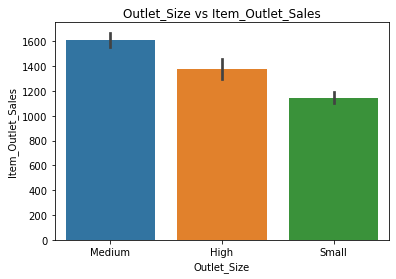

In [229]:
sns.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)
plt.title("Outlet_Size vs Item_Outlet_Sales")
plt.show()

The graph shows the medium outlet size having the more outlet sales

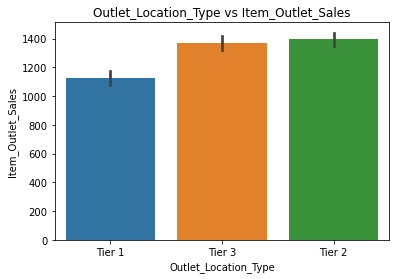

In [230]:
sns.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df)
plt.title("Outlet_Location_Type vs Item_Outlet_Sales")
plt.show()

 The graph shows the tier 2 location having the more item sales

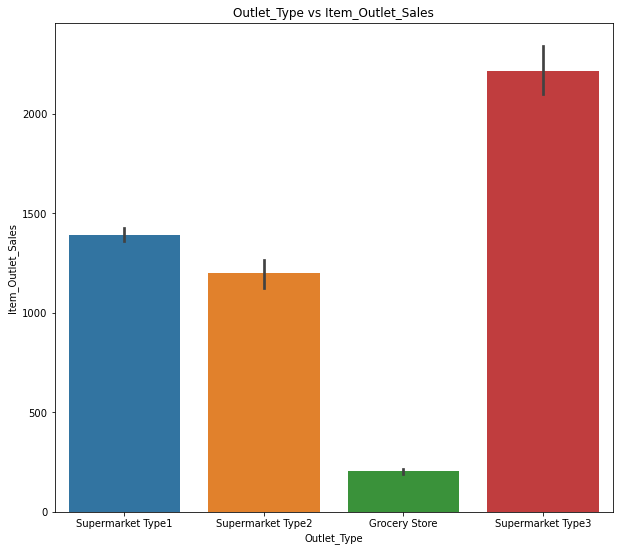

In [231]:
plt.figure(figsize = (10,9))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)
plt.title("Outlet_Type vs Item_Outlet_Sales")
plt.show()

The Graph shows the Super market type 3 having more item sales

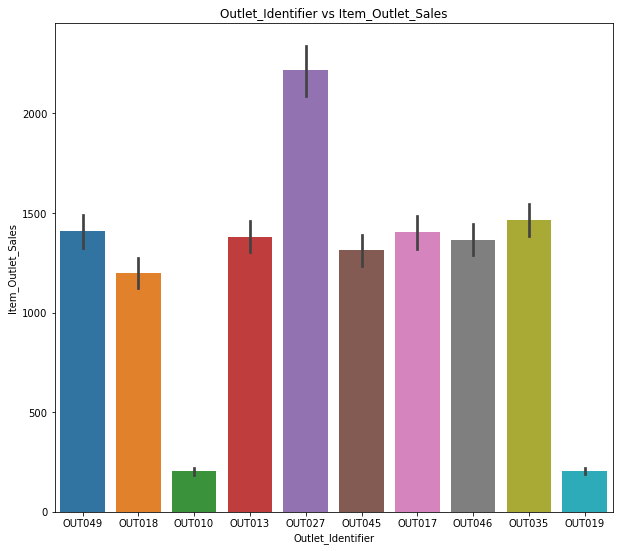

In [232]:
plt.figure(figsize = (10,9))
sns.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=df)
plt.title("Outlet_Identifier vs Item_Outlet_Sales")
plt.show()

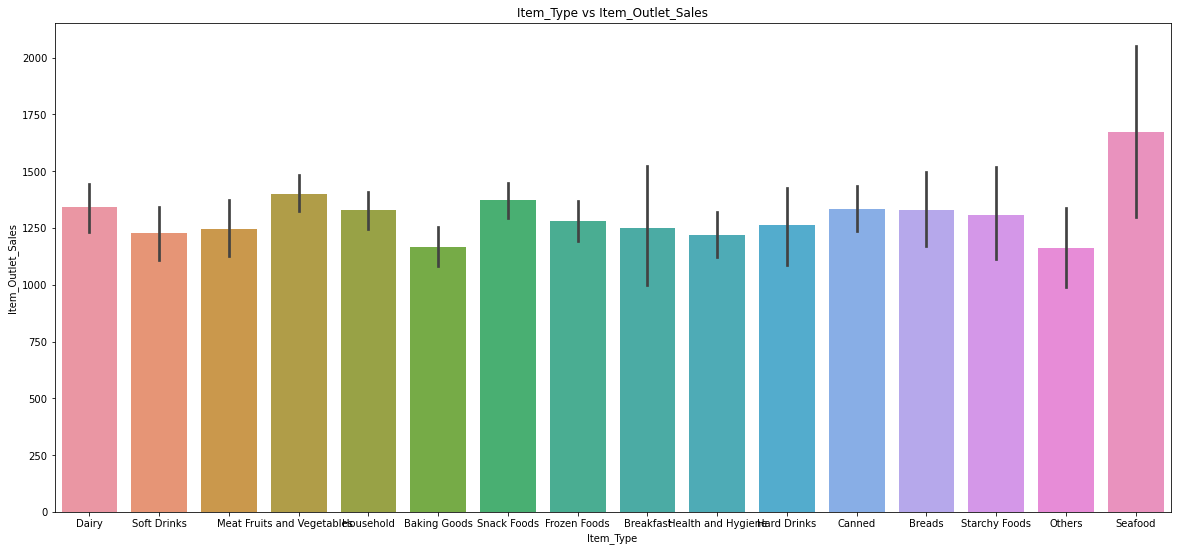

In [233]:
plt.figure(figsize = (20,9))
sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=df)
plt.title("Item_Type vs Item_Outlet_Sales")
plt.show()

In [234]:
df = df.fillna(df.median())

In [235]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [236]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [237]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mode()[0], inplace = True)

In [238]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [239]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [240]:
# Getting the first two characters of ID to separate them into different categories
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['Item_Identifier'] = df['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

df['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [241]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [242]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [243]:
# label encoding

from sklearn.preprocessing import LabelEncoder

df.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,1,284,0,1097,4,7567,9,4,1,0,1,2541,4
1,0,57,1,1436,14,632,3,8,1,2,2,423,0
2,1,375,0,1172,10,3897,9,4,1,0,1,1640,4
3,1,392,1,0,6,5626,0,3,1,2,0,671,5
4,2,265,0,0,9,848,1,1,0,2,1,866,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,0,6
5677,1,180,1,11820,15,5069,3,8,1,2,2,0,0
5678,2,293,0,8009,8,3196,7,5,1,1,1,0,3
5679,1,353,1,0,3,6626,2,7,1,1,1,0,1


In [244]:
df= pd.get_dummies(df)

print(df.shape)

(14204, 47)


In [245]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.015366,0.033008,0.012448,0.015590,-0.012448,-0.042452,-0.017906,0.052015,0.030091,...,0.002350,-0.001906,0.000437,0.000353,0.005729,-0.005826,-0.008719,0.012439,0.003623,-0.013245
Item_Visibility,-0.015366,1.000000,-0.006351,-0.083678,-0.075008,0.083678,-0.006937,0.066547,-0.071316,-0.044274,...,-0.038887,-0.030041,0.059641,0.051019,-0.067618,0.018021,0.286535,-0.148925,-0.040590,-0.038275
Item_MRP,0.033008,-0.006351,1.000000,0.000141,0.342781,-0.000141,-0.042036,0.019135,0.009151,0.004019,...,0.000697,0.000362,-0.000877,-0.000658,-0.000192,0.000790,-0.000269,0.000176,-0.000023,0.000042
Outlet_Establishment_Year,0.012448,-0.083678,0.000141,1.000000,-0.029489,-1.000000,0.002841,-0.001080,-0.000864,-0.000137,...,-0.453297,0.342095,-0.056481,-0.201609,0.540880,-0.334013,-0.281150,0.245260,0.466286,-0.538167
Item_Outlet_Sales,0.015590,-0.075008,0.342781,-0.029489,1.000000,0.029489,-0.018266,0.020007,-0.009456,-0.010210,...,0.014600,0.045279,-0.059310,-0.067071,0.035136,0.027930,-0.248036,0.065558,-0.022833,0.187285
Outlet_Years,-0.012448,0.083678,-0.000141,-1.000000,0.029489,1.000000,-0.002841,0.001080,0.000864,0.000137,...,0.453297,-0.342095,0.056481,0.201609,-0.540880,0.334013,0.281150,-0.245260,-0.466286,0.538167
Item_Identifier_Drinks,-0.042452,-0.006937,-0.042036,0.002841,-0.018266,-0.002841,1.000000,-0.510323,-0.154377,0.180962,...,0.000782,0.002002,-0.002717,-0.003798,0.001389,0.002158,-0.003178,0.001662,0.000510,0.000349
Item_Identifier_Food,-0.017906,0.066547,0.019135,-0.001080,0.020007,0.001080,-0.510323,1.000000,-0.770891,-0.427379,...,0.000336,-0.001387,0.001272,0.001621,-0.000689,-0.000829,0.000324,-0.000575,0.000853,-0.000320
Item_Identifier_Non_Consumable,0.052015,-0.071316,0.009151,-0.000864,-0.009456,0.000864,-0.154377,-0.770891,1.000000,0.356971,...,-0.000965,0.000110,0.000551,0.000951,-0.000238,-0.000646,0.001982,-0.000571,-0.001357,0.000110
Item_Fat_Content_Low Fat,0.030091,-0.044274,0.004019,-0.000137,-0.010210,0.000137,0.180962,-0.427379,0.356971,1.000000,...,-0.000116,-0.000632,0.000767,0.001095,0.000283,-0.001279,-0.000973,0.000943,-0.000340,-0.000059


In [246]:
x = df.drop('Item_Outlet_Sales', axis = 1)
y = df.Item_Outlet_Sales

In [247]:
print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [248]:
train = df.iloc[:8523,:]
test = df.iloc[8523:,:]

In [249]:
print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [252]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9942, 46)
(9942,)
(4262, 46)
(4262,)


#Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [254]:
lm= LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.20779815900251064

In [255]:
y_pred = lm.predict(x_test)
print(y_pred)


[1133.88363252 1134.02337482  549.83103191 ...  924.11614901 1179.57793715
 2467.35297693]


In [256]:
mse = mean_squared_error(y_test, y_pred)
print('RMSE :',np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


print("Result :",model.score(x_train, y_train))


RMSE : 1488.2538608966227
Variance score: 0.20
Result : -0.20603206865308366


In [257]:
from sklearn.ensemble import AdaBoostRegressor

In [258]:
model1= AdaBoostRegressor(n_estimators = 100)
model1.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [259]:
y_pred = model1.predict(x_test)

In [260]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


RMSE : 1548.6419773857615


In [261]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()
model2.fit(x_train, y_train)

# predicting the test set results
y_pred = model2.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model2.score(x_train, y_train))


[1164.77960341 1167.89541913  539.79278571 ... 1074.92643949 1297.31270294
 2109.07235469]
RMSE : 1482.8201298543459
Variance score: 0.20
Result : 0.2680679113396809


In [262]:
from sklearn.ensemble import RandomForestRegressor

model3= RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model3.fit(x_train, y_train)

# predicting the  test set results
y_pred = model3.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model3.score(x_train, y_train))

[1427.601702 1004.22614   759.91083  ... 1485.612856 1258.448554
 2535.692642]
RMSE : 1558.2907270409696
Variance score: 0.12
Result : 0.8762670440112221


In [265]:
from sklearn.tree import DecisionTreeRegressor

model4 = DecisionTreeRegressor()
model4.fit(x_train, y_train)

# predicting the test set results
y_pred = model4.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model4.score(x_train, y_train))

[3495.45  1807.647  808.947 ...    0.       0.    6624.71 ]
 RMSE :  2165.3059192098394
Variance score: -0.70
Result : 1.0


In [266]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.00734497 0.00384067 0.01966436 0.         0.        ]
0.0 0.006170001502468691 0.019664363403953944 0.007280686383432309


In [267]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(model1,x,y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.35745264 0.34486148 0.36173758 0.38553173 0.38631331 0.3312268
 0.         0.         0.         0.        ]
0.0 0.21671235327097937 0.3863133050624934 0.17762244843819416


In [268]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(model2,x,y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.13556709 0.14603282 0.16777886 0.11209017 0.14056961 0.15845012
 0.         0.         0.         0.        ]
0.0 0.08604886716032757 0.16777886092543393 0.07158222811153053


In [269]:
from sklearn.model_selection import KFold
kfold=KFold(10)

score=cross_val_score(model3,x,y,cv=kfold)
print(score)
print(score.min(),score.mean(),score.max(),score.std())

[0.08167172 0.10140695 0.1042683  0.07013354 0.07735221 0.12033866
 0.         0.         0.         0.        ]
0.0 0.05551713639379795 0.12033865528607357 0.047315389872739165


As per crosss validation the model2 giving the highest value

# Export The Data

In [270]:
import pickle
filename="Wine_Quality.pkl"
pickle.dump(model2,open(filename,'wb'))

In [271]:
import numpy as np
a=np.array(y_test)
predicted=np.array(model2.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [272]:
df_com

,orginal,predicted
0,2656.5420,1164.779603
1,0.0000,1167.895419
2,0.0000,539.792786
3,898.8300,1302.942948
4,5321.0736,1983.706810
...,...,...
4257,1444.1202,1314.047637
4258,0.0000,441.268240
4259,829.5868,1074.926439
4260,1225.0720,1297.312703
